In [66]:
import matplotlib.pyplot as plt
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tolerance = tolerance  # Stop early if gradient updates are very small
        self.weights = None
        self.bias = 0
        self.loss_history = []  # Store MSE loss for visualization
        self.history = []  # Store weight and bias updates

    def mse(self, y, y_hat):
        error = sum((y_hat[i] - y[i]) ** 2 for i in range(len(y)))
        return error / len(y)

    def compute_y_hat(self, x):
        return sum(x[i] * self.weights[i] for i in range(len(self.weights))) + self.bias  # Handle multiple features

    def compute_gradients(self, X, y):
        n_samples = len(X)
        n_features = len(X[0])
        dw = [0] * n_features
        db = 0

        for j in range(n_samples):
            y_pred = self.compute_y_hat(X[j])
            error = y[j] - y_pred
            for i in range(n_features):
                dw[i] += error * X[j][i]
            db += error

        dw = [-(2 / n_samples) * dwi for dwi in dw]
        db *= -(2 / n_samples)

        return dw, db

    def descent(self, dw, db):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * dw[i]
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        n_features = len(X[0])
        self.weights = [0] * n_features
        prev_dw, prev_db = [float('inf')] * n_features, float('inf')  # Track previous gradients

        for epoch in range(self.epochs):
            dw, db = self.compute_gradients(X, y)

            # Simple early stopping: Check if gradient change is small
            if all(abs(dw[i] - prev_dw[i]) < self.tolerance for i in range(n_features)) and abs(db - prev_db) < self.tolerance:
                print(f'Converged at epoch {epoch}')
                break

            self.descent(dw, db)
            prev_dw, prev_db = dw, db  # Store previous gradients

            # Store weight, bias, and loss for visualization
            y_pred = self.predict(X)
            loss = self.mse(y, y_pred)
            self.loss_history.append(loss)
            self.history.append((self.weights[:], self.bias))

    def predict(self, X):
        return [self.compute_y_hat(x) for x in X]

    def visualize_training(self, X, y):
        plt.figure(figsize=(12, 5))

        # Plot loss over epochs
        plt.subplot(1, 2, 1)
        plt.plot(range(len(self.loss_history)), self.loss_history, color='red')
        plt.xlabel("Epochs")
        plt.ylabel("MSE Loss")
        plt.title("Loss Over Iterations")

        # Plot regression line evolution (only for the first feature)
        plt.subplot(1, 2, 2)
        x_vals = [x[0] for x in X]  # Use only the first feature for visualization
        plt.scatter(x_vals, y, color='blue', label='Actual Data')

        for i, (weights, b) in enumerate(self.history[::max(1, len(self.history)//10)]):
            y_vals = [sum(weights[j] * x[j] for j in range(len(weights))) + b for x in X]
            plt.plot(x_vals, y_vals, color='gray', alpha=0.3, linestyle='dashed')

        # Final regression line
        y_final = [sum(self.weights[j] * x[j] for j in range(len(self.weights))) + self.bias for x in X]
        plt.plot(x_vals, y_final, color='red', label='Final Fit')

        plt.xlabel("Feature Value (First Feature)")
        plt.ylabel("Target Value")
        plt.title("Regression Line Evolution")
        plt.legend()

        plt.show()

# Feature Scaling Methods

def min_max_scaling(X):
    min_vals = [min(col) for col in zip(*X)]
    max_vals = [max(col) for col in zip(*X)]
    return [[(x[i] - min_vals[i]) / (max_vals[i] - min_vals[i]) for i in range(len(x))] for x in X]


def standard_scaling(X):
    means = [sum(col)/len(col) for col in zip(*X)]
    std_devs = [np.std(col) for col in zip(*X)]
    return [[(x[i] - means[i]) / std_devs[i] for i in range(len(x))] for x in X]


def mean_normalization(X):
    means = [sum(col)/len(col) for col in zip(*X)]
    min_vals = [min(col) for col in zip(*X)]
    max_vals = [max(col) for col in zip(*X)]
    return [[(x[i] - means[i]) / (max_vals[i] - min_vals[i]) for i in range(len(x))] for x in X]


def robust_scaling(X):
    medians = [np.median(col) for col in zip(*X)]
    iqr = [np.percentile(col, 75) - np.percentile(col, 25) for col in zip(*X)]
    return [[(x[i] - medians[i]) / iqr[i] if iqr[i] != 0 else 0 for i in range(len(x))] for x in X]




In [67]:
#3
X = [[100], [200], [300], [400], [500], [600], [700], [800], [900], [1000]]
y = [1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500]  # y = 0.5x + 1000




exp1=LinearRegression(learning_rate=0.0025,epochs=500)
exp1.fit(X, y)
exp1.visualize_training(X, y)
#fails therefore we scale it


OverflowError: (34, 'Numerical result out of range')

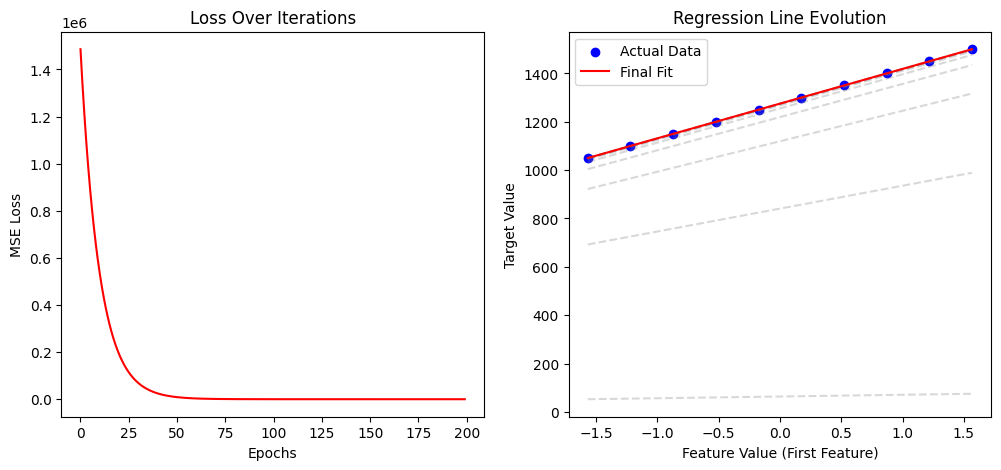

In [71]:
X = min_max_scaling(X)  # Change to desired scaling method
model = LinearRegression(learning_rate=0.025,epochs=200)
model.fit(X, y)
model.visualize_training(X, y)
#works well for large values minmax

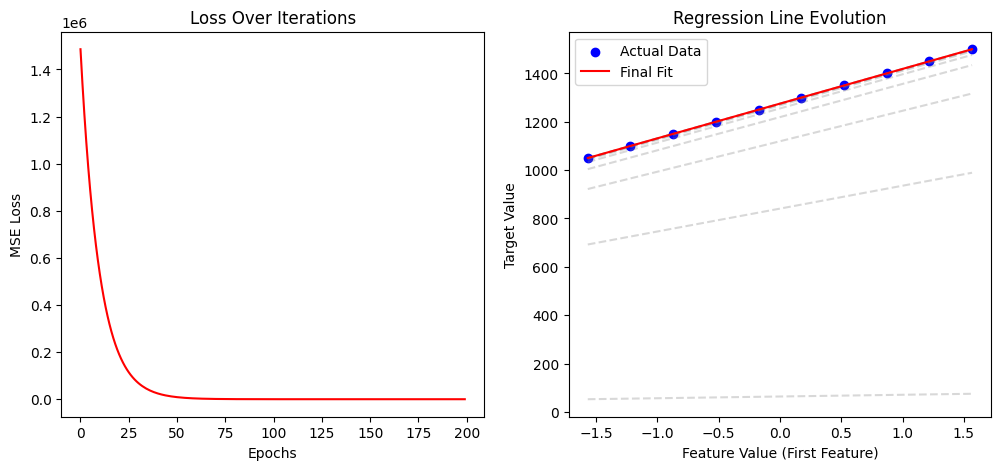

In [72]:
X = standard_scaling(X)  # Change to desired scaling method
model = LinearRegression(learning_rate=0.025,epochs=200)
model.fit(X, y)
model.visualize_training(X, y)
#works well for large values minmax

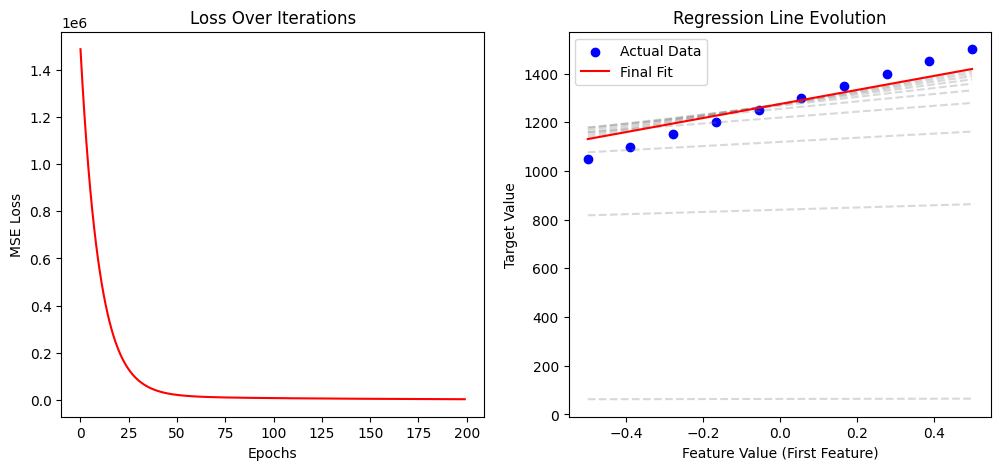

In [73]:
X = mean_normalization(X)  # Change to desired scaling method
model = LinearRegression(learning_rate=0.025,epochs=200)
model.fit(X, y)
model.visualize_training(X, y)
#not that great, min max and standard converge faster

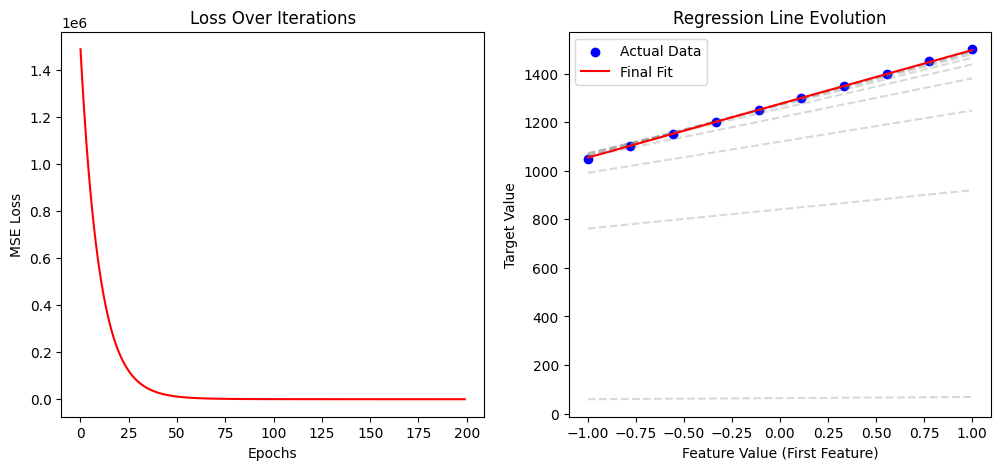

In [74]:
X = robust_scaling(X)  # Change to desired scaling method
model = LinearRegression(learning_rate=0.025,epochs=200)
model.fit(X, y)
model.visualize_training(X, y)
#seems as good as min max and standard

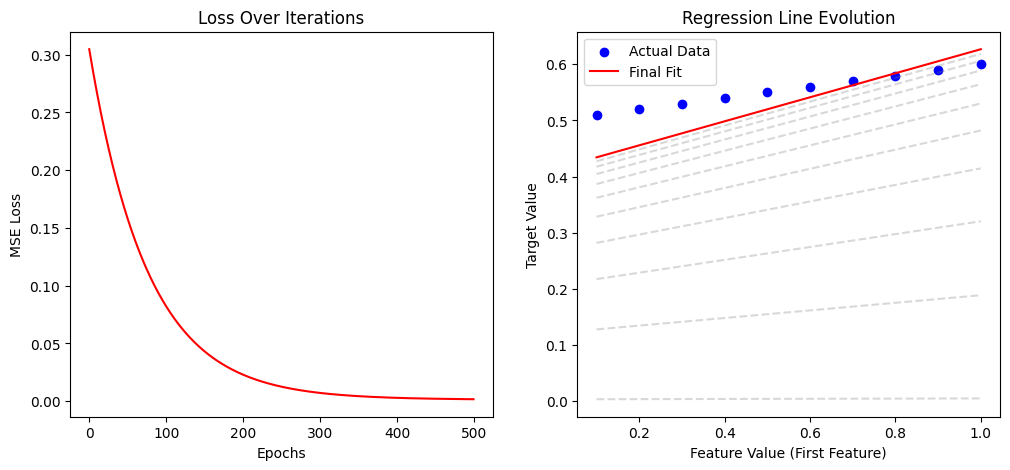

In [75]:
#for small values
X = [[0.1], [0.2], [0.3], [0.4], [0.5], [0.6], [0.7], [0.8], [0.9], [1.0]]
y = [0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60]  # y = 0.01x + 0.5
exp1=LinearRegression(learning_rate=0.0025,epochs=500)
exp1.fit(X, y)
exp1.visualize_training(X, y)

Converged at epoch 201


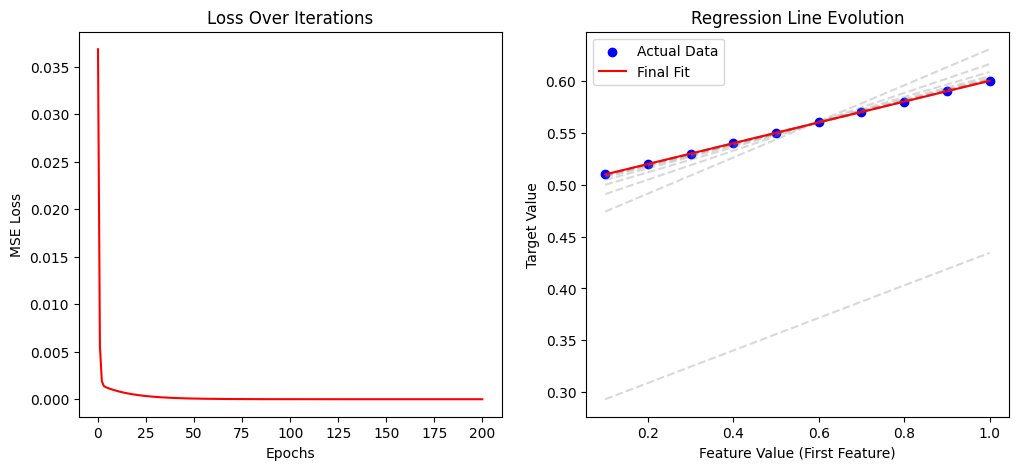

In [77]:
exp2=LinearRegression(learning_rate=0.25,epochs=500)
exp2.fit(X, y)
exp2.visualize_training(X, y)
#requires higher learning rate to converge faster

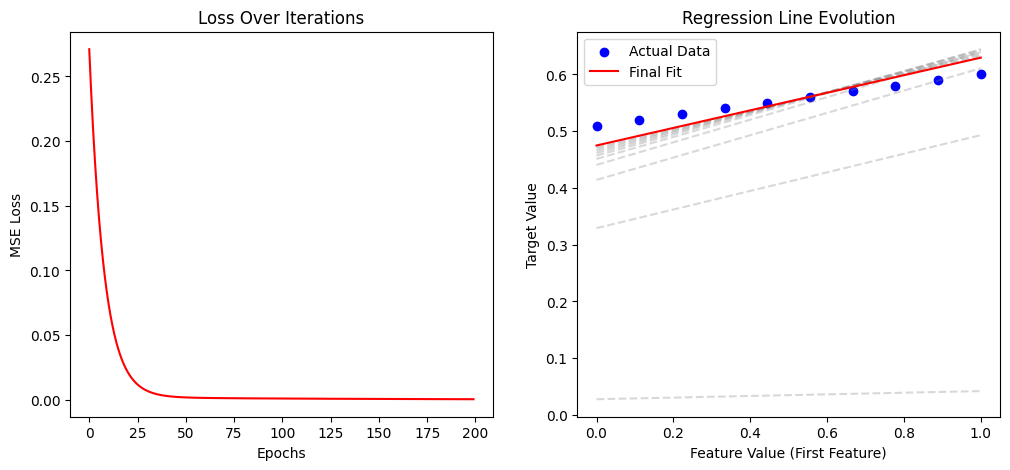

In [78]:
X = min_max_scaling(X)  # Change to desired scaling method
model = LinearRegression(learning_rate=0.025,epochs=200)
model.fit(X, y)
model.visualize_training(X, y)
#not great for small values

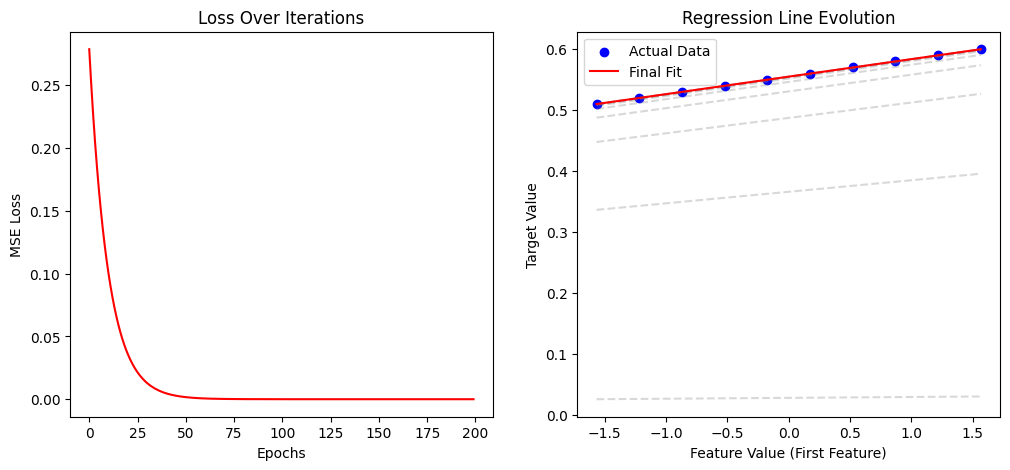

In [79]:
X = standard_scaling(X)  # Change to desired scaling method
model = LinearRegression(learning_rate=0.025,epochs=200)
model.fit(X, y)
model.visualize_training(X, y)
#great for small values

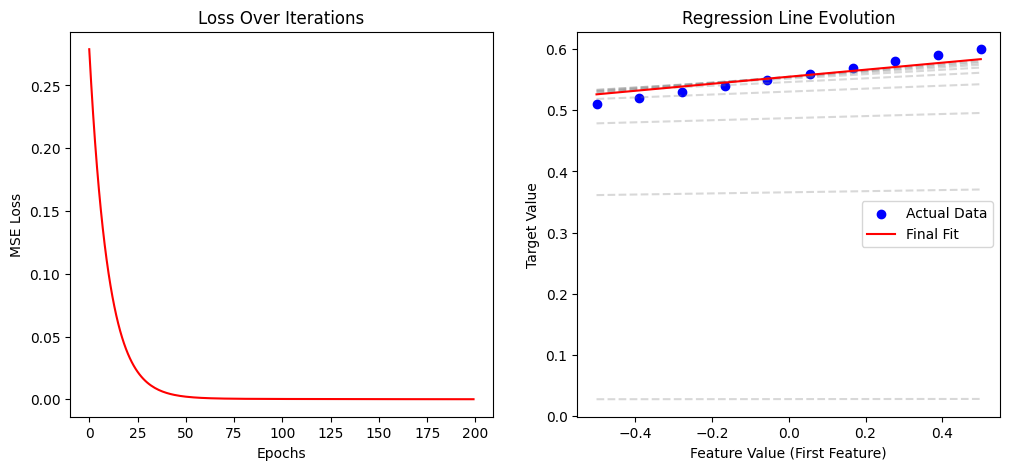

In [80]:
X = mean_normalization(X)  # Change to desired scaling method
model = LinearRegression(learning_rate=0.025,epochs=200)
model.fit(X, y)
model.visualize_training(X, y)
#not great for small values

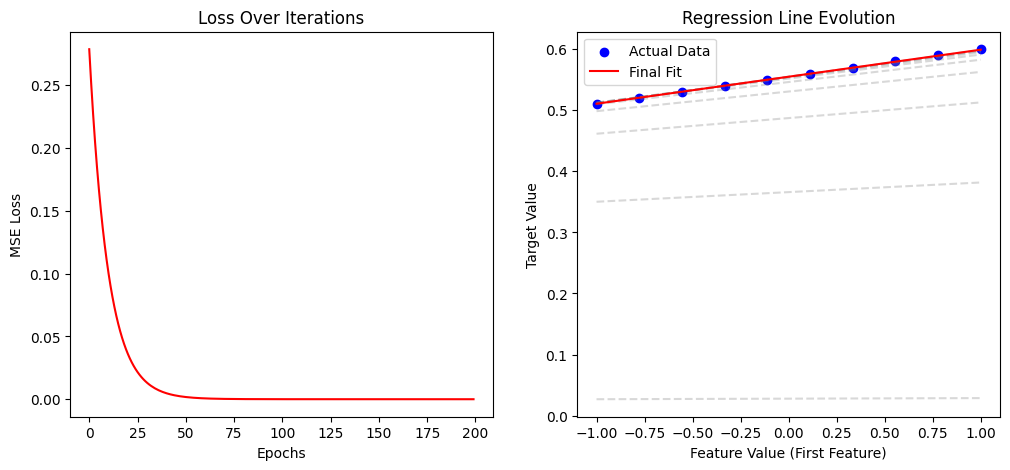

In [81]:
X = robust_scaling(X)  # Change to desired scaling method
model = LinearRegression(learning_rate=0.025,epochs=200)
model.fit(X, y)
model.visualize_training(X, y)
#great for small values

Converged at epoch 274


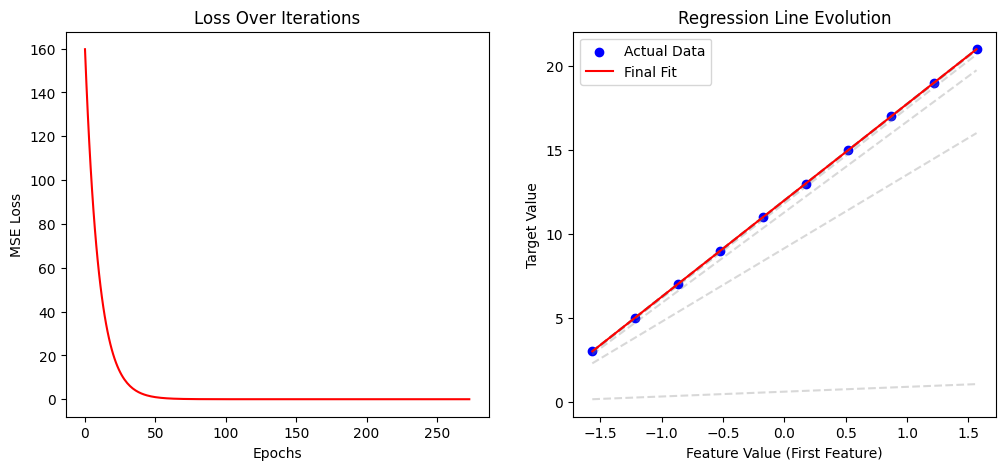

In [84]:
#robust scaling vs standard scaler for normal values
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

scaled_X = standard_scaling(X)  # Change to desired scaling method
model = LinearRegression(learning_rate=0.025,epochs=1000)
model.fit(scaled_X, y)
model.visualize_training(scaled_X, y)

Converged at epoch 580


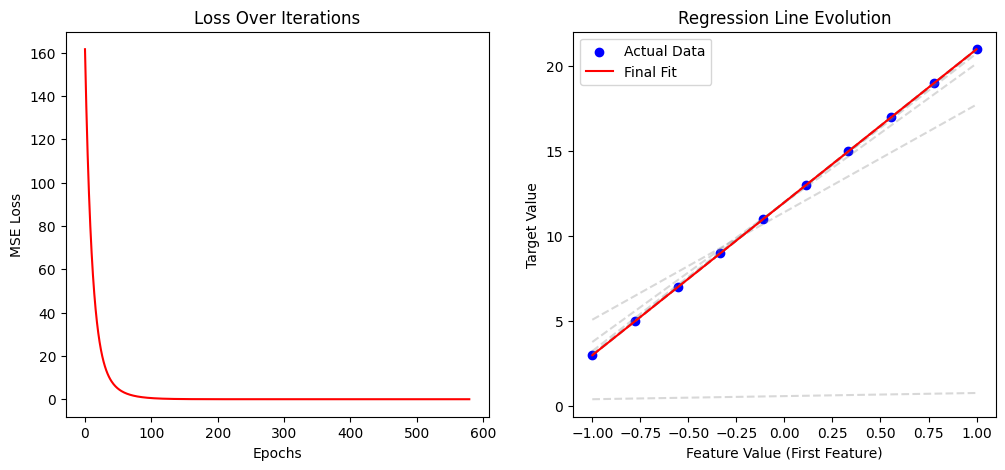

In [85]:
scaled_X = robust_scaling(X)
model = LinearRegression(learning_rate=0.025,epochs=1000)
model.fit(scaled_X, y)
model.visualize_training(scaled_X, y)
#standard converges faster!!